# Set up and Read in Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_FILE_PATH = 'drive/MyDrive/4B Projects/MSCI 598 (Deep Learning for NLP) Project/Code'

df_train = pd.read_csv(DATA_FILE_PATH+"/train.csv")
df_val = pd.read_csv(DATA_FILE_PATH+"/val.csv")
df_test = pd.read_csv(DATA_FILE_PATH+"/test.csv")

In [ ]:
# Print number in each group.
print("Training: ", len(df_train))
print("Val: ", len(df_val))
print("Test: ", len(df_test))

Training:  50971
Val:  6471
Test:  4621


## Preprocess Text (Convert to Vector)

In [ ]:
# Lemmatize, remove stopwords, lowercase, but breaks into unigrams and bigrams.
# Code adapted from https://stackoverflow.com/questions/50155188/lemmatization-on-countvectorizer-doesnt-remove-stopwords
lemmatizer = WordNetLemmatizer()

class LemmaTokenizer(object):
    def __call__(self, text):
        return [lemmatizer.lemmatize(t) for t in word_tokenize(text)]

my_stop_words = [lemmatizer.lemmatize(t) for t in stopwords.words('english')]

cv = CountVectorizer(stop_words=my_stop_words, ngram_range=(1, 2), lowercase=True, tokenizer=LemmaTokenizer())
X_train = cv.fit_transform(df_train["text"].astype(str))
X_val = cv.transform(df_val["text"].astype(str))
X_test = cv.transform(df_test["text"].astype(str))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)


## XGBoost Model

In [ ]:
def train_binary_classifier(y_train, y_test):
  # Fit XGB model.
  model = XGBClassifier()
  model.fit(X_train, y_train)
  
  # Predict on test set and compute accuracy.
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)

  print("* Accuracy: %.2f%%" % (accuracy * 100.0))

  fig, ax = plt.subplots(figsize=(10, 10))
  plt.rcParams.update({'font.size': 24})

  plot_confusion_matrix(model, X_test, y_test, ax=ax)
  plt.show()

  return model, accuracy, y_pred

In [ ]:
# Gets the proportion of IE within each group for train dataset.
df_train.groupby("IE").count() / df_train.count()

,IE,JP,NS,TF,Unnamed: 0,Unnamed: 0.1,mbti,movie_clean,role,text
IE,,,,,,,,,,
0,NaN,0.483334,0.483334,0.483334,0.483334,0.483334,0.483334,0.483334,0.483334,0.483332
1,NaN,0.516666,0.516666,0.516666,0.516666,0.516666,0.516666,0.516666,0.516666,0.516668


In [ ]:
# Gets the proportion of IE within each group for test dataset.
df_test.groupby("IE").count() / df_test.count()

,IE,IE_pred,JP,JP_pred,NS,NS_pred,TF,TF_pred,Unnamed: 0,Unnamed: 0.1,mbti,movie_clean,role,text
IE,,,,,,,,,,,,,,
0,NaN,0.406622,0.406622,0.406622,0.406622,0.406622,0.406622,0.406622,0.406622,0.406622,0.406622,0.406622,0.406622,0.406622
1,NaN,0.593378,0.593378,0.593378,0.593378,0.593378,0.593378,0.593378,0.593378,0.593378,0.593378,0.593378,0.593378,0.593378


* Accuracy: 55.77%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


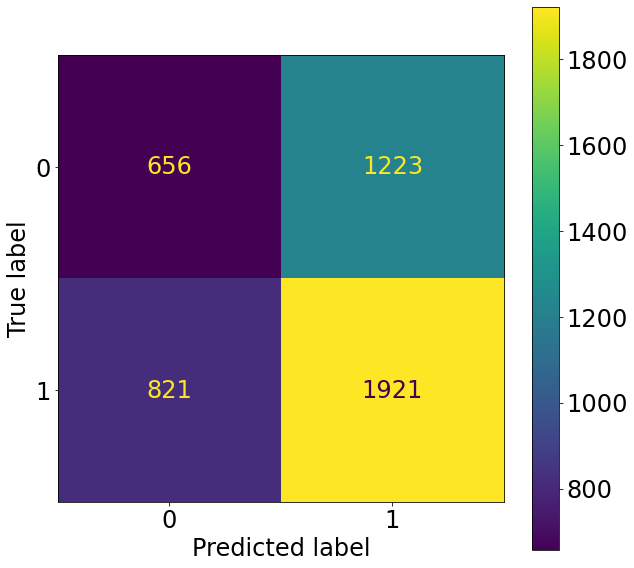

In [ ]:
# IE Model
y_train_ie = df_train["IE"]
y_val_ie = df_val["IE"]
y_test_ie = df_test["IE"]

ie_model, ie_accuracy, ie_predict = train_binary_classifier(y_train_ie, y_test_ie)

In [ ]:
# Gets the proportion of NS within each group for train dataset.
df_train.groupby("NS").count() / df_train.count()

,IE,JP,NS,TF,Unnamed: 0,Unnamed: 0.1,mbti,movie_clean,role,text
NS,,,,,,,,,,
0,0.526594,0.526594,NaN,0.526594,0.526594,0.526594,0.526594,0.526594,0.526594,0.526616
1,0.473406,0.473406,NaN,0.473406,0.473406,0.473406,0.473406,0.473406,0.473406,0.473384


In [ ]:
# Gets the proportion of NS within each group for test dataset.
df_test.groupby("NS").count() / df_test.count()

,IE,IE_pred,JP,JP_pred,NS,NS_pred,TF,TF_pred,Unnamed: 0,Unnamed: 0.1,mbti,movie_clean,role,text
NS,,,,,,,,,,,,,,
0,0.519801,0.519801,0.519801,0.519801,NaN,0.519801,0.519801,0.519801,0.519801,0.519801,0.519801,0.519801,0.519801,0.519801
1,0.480199,0.480199,0.480199,0.480199,NaN,0.480199,0.480199,0.480199,0.480199,0.480199,0.480199,0.480199,0.480199,0.480199


* Accuracy: 51.81%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


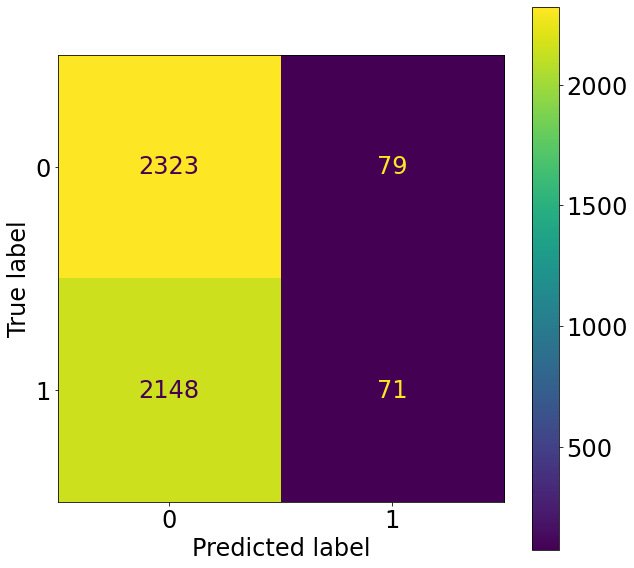

In [ ]:
# NS Model
y_train_ns = df_train["NS"]
y_val_ns = df_val["NS"]
y_test_ns = df_test["NS"]

ns_model, ns_accuracy, ns_predict = train_binary_classifier(y_train_ns, y_test_ns)

In [ ]:
# Gets the proportion of TF within each group for train dataset.
df_train.groupby("TF").count() / df_train.count()

,IE,JP,NS,TF,Unnamed: 0,Unnamed: 0.1,mbti,movie_clean,role,text
TF,,,,,,,,,,
0,0.597477,0.597477,0.597477,NaN,0.597477,0.597477,0.597477,0.597477,0.597477,0.597508
1,0.402523,0.402523,0.402523,NaN,0.402523,0.402523,0.402523,0.402523,0.402523,0.402492


In [ ]:
# Gets the proportion of TF within each group for test dataset.
df_test.groupby("TF").count() / df_test.count()

,IE,IE_pred,JP,JP_pred,NS,NS_pred,TF,TF_pred,Unnamed: 0,Unnamed: 0.1,mbti,movie_clean,role,text
TF,,,,,,,,,,,,,,
0,0.545337,0.545337,0.545337,0.545337,0.545337,0.545337,NaN,0.545337,0.545337,0.545337,0.545337,0.545337,0.545337,0.545337
1,0.454663,0.454663,0.454663,0.454663,0.454663,0.454663,NaN,0.454663,0.454663,0.454663,0.454663,0.454663,0.454663,0.454663


* Accuracy: 54.71%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


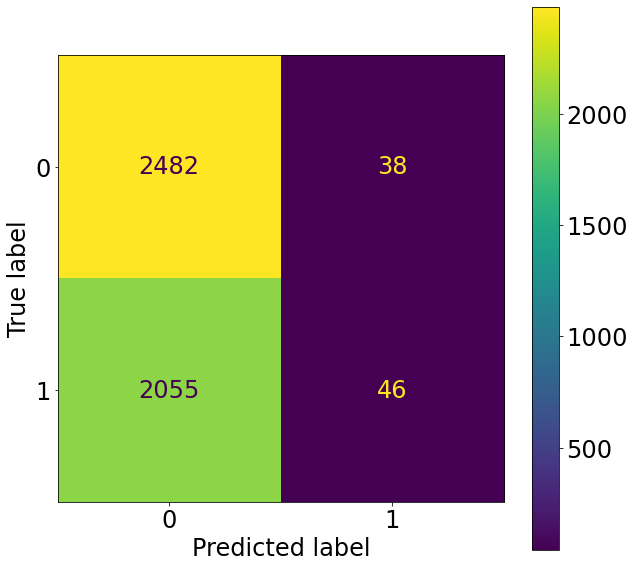

In [ ]:
# TF Model
y_train_tf = df_train["TF"]
y_val_tf = df_val["TF"]
y_test_tf = df_test["TF"]

tf_model, tf_accuracy, tf_predict = train_binary_classifier(y_train_tf, y_test_tf)

In [ ]:
# Gets the proportion of JP within each group for train dataset.
df_train.groupby("JP").count() / df_train.count()

,IE,JP,NS,TF,Unnamed: 0,Unnamed: 0.1,mbti,movie_clean,role,text
JP,,,,,,,,,,
0,0.599772,NaN,0.599772,0.599772,0.599772,0.599772,0.599772,0.599772,0.599772,0.599745
1,0.400228,NaN,0.400228,0.400228,0.400228,0.400228,0.400228,0.400228,0.400228,0.400255


In [ ]:
# Gets the proportion of JP within each group for test dataset.
df_test.groupby("JP").count() / df_test.count()

,IE,IE_pred,JP,JP_pred,NS,NS_pred,TF,TF_pred,Unnamed: 0,Unnamed: 0.1,mbti,movie_clean,role,text
JP,,,,,,,,,,,,,,
0,0.47111,0.47111,NaN,0.47111,0.47111,0.47111,0.47111,0.47111,0.47111,0.47111,0.47111,0.47111,0.47111,0.47111
1,0.52889,0.52889,NaN,0.52889,0.52889,0.52889,0.52889,0.52889,0.52889,0.52889,0.52889,0.52889,0.52889,0.52889


* Accuracy: 47.18%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


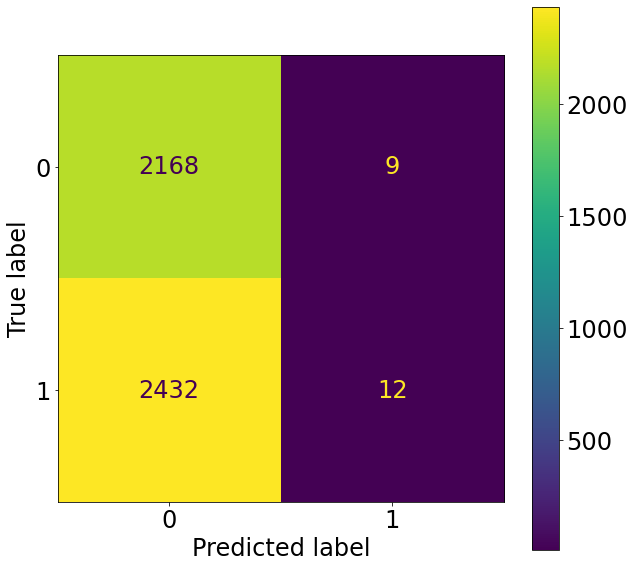

In [ ]:
# JP Model
y_train_jp = df_train["JP"]
y_val_jp = df_val["JP"]
y_test_jp = df_test["JP"]

jp_model, jp_accuracy, jp_predict = train_binary_classifier(y_train_jp, y_test_jp)

### Accuracy Values

In [ ]:
# Macroaverage accuracy of the four classifiers.
macroavg_accuracy = (ie_accuracy + jp_accuracy + ns_accuracy + tf_accuracy) / 4
print("* Macroaverage Accuracy: %.2f%%" % (macroavg_accuracy * 100.0))

* Macroaverage Accuracy: 52.36%


In [ ]:
# Microaverage accuracy of the four classifiers.
microavg_accuracy = ((656+1921)+(2168+12)+(2323+71)+(2482+46)) / (4*len(df_test))
print("* Microaverage Accuracy: %.2f%%" % (microavg_accuracy * 100.0))

* Microaverage Accuracy: 52.36%


In [ ]:
df_results = df_test

df_results["IE_pred"] = ie_model.predict(X_test)
df_results["NS_pred"] = ns_model.predict(X_test)
df_results["TF_pred"] = tf_model.predict(X_test)
df_results["JP_pred"] = jp_model.predict(X_test)

full_match = df_results[(df_results["IE"] == df_results["IE_pred"]) & (df_results["NS"] == df_results["NS_pred"]) & (df_results["TF"] == df_results["TF_pred"]) & (df_results["JP"] == df_results["JP_pred"])].count()["text"]
print("* Full Match Accuracy: %.2f%%" % (full_match/len(df_test) * 100.0))

* Full Match Accuracy: 5.63%
